In [1]:
import numpy as np

# Define possible actions in the environment
ACTION_SPACE = ('U', 'D', 'L', 'R')  # U: Up, D: Down, L: Left, R: Right

class Grid:  # Environment representing a grid world
  def __init__(self, rows, cols, start):
    """
    Initialize the grid environment with the given dimensions and starting position.
    :param rows: Number of rows in the grid
    :param cols: Number of columns in the grid
    :param start: Starting position (i, j) for the agent
    """
    self.rows = rows
    self.cols = cols
    self.i = start[0]
    self.j = start[1]

  def set(self, rewards, actions):
    """
    Set the rewards and possible actions for each cell in the grid.
    :param rewards: Dictionary where keys are (i, j) positions and values are rewards
    :param actions: Dictionary where keys are (i, j) positions and values are lists of allowed actions
    """
    self.rewards = rewards
    self.actions = actions

  def set_state(self, s):
    """
    Set the agent's position in the grid to a specific state.
    :param s: Tuple (i, j) representing the agent's new position
    """
    self.i = s[0]
    self.j = s[1]

  def current_state(self):
    """
    Returns the current state (position) of the agent.
    :return: Tuple (i, j) representing the agent's current position
    """
    return (self.i, self.j)

  def is_terminal(self, s):
    """
    Check if a state is terminal, meaning there are no actions available from this state.
    :param s: Tuple (i, j) representing a state
    :return: True if the state is terminal, False otherwise
    """
    return s not in self.actions

  def reset(self):
    """
    Reset the agent to the starting position.
    :return: Tuple (i, j) representing the agent's start position
    """
    self.i = 2
    self.j = 0
    return (self.i, self.j)

  def get_next_state(self, s, a):
    """
    Get the next state given a current state and an action.
    :param s: Current state (i, j) as a tuple
    :param a: Action to be taken ('U', 'D', 'L', 'R')
    :return: Tuple (new_i, new_j) representing the next state after taking action
    """
    i, j = s[0], s[1]

    # Update position based on the action, if the action is allowed from the current state
    if a in self.actions[(i, j)]:
      if a == 'U':
        i -= 1
      elif a == 'D':
        i += 1
      elif a == 'R':
        j += 1
      elif a == 'L':
        j -= 1
    return i, j

  def move(self, action):
    """
    Move the agent in the specified direction, if the action is allowed from the current position.
    :param action: Action to take ('U', 'D', 'L', 'R')
    :return: Reward received after taking the action
    """
    # Check if the action is valid in the current state
    if action in self.actions[(self.i, self.j)]:
      if action == 'U':
        self.i -= 1
      elif action == 'D':
        self.i += 1
      elif action == 'R':
        self.j += 1
      elif action == 'L':
        self.j -= 1
    # Return the reward for the new position, defaulting to 0 if no reward is defined
    return self.rewards.get((self.i, self.j), 0)

  def undo_move(self, action):
    """
    Undo the last move, moving the agent in the opposite direction of the action.
    :param action: Action to undo ('U', 'D', 'L', 'R')
    """
    # Move in the opposite direction of the specified action
    if action == 'U':
      self.i += 1
    elif action == 'D':
      self.i -= 1
    elif action == 'R':
      self.j -= 1
    elif action == 'L':
      self.j += 1
    # Ensure the state after undoing is valid
    assert(self.current_state() in self.all_states())

  def game_over(self):
    """
    Check if the game is over, which is true if the agent is in a terminal state.
    :return: True if in a terminal state, False otherwise
    """
    return (self.i, self.j) not in self.actions

  def all_states(self):
    """
    Get all possible states in the grid, defined as any position with actions or rewards.
    :return: Set of tuples representing all possible states
    """
    return set(self.actions.keys()) | set(self.rewards.keys())


def standard_grid():
  """
  Define a standard 3x4 grid with rewards and actions.
  Layout:
    .  .  .  1
    .  x  . -1
    s  .  .  .
  Legend:
    - s: Starting position
    - x: Blocked position (no actions allowed)
    - Numbers: Rewards at certain states

  :return: An instance of the Grid class with rewards and actions set
  """
  g = Grid(3, 4, (2, 0))  # 3x4 grid with start position at (2, 0)

  # Define rewards for reaching specific states
  rewards = {(0, 3): 1, (1, 3): -1}

  # Define possible actions from each state
  actions = {
    (0, 0): ('D', 'R'),  # Can go Down or Right from (0, 0)
    (0, 1): ('L', 'R'),  # Can go Left or Right from (0, 1)
    (0, 2): ('L', 'D', 'R'),  # Can go Left, Down, or Right from (0, 2)
    (1, 0): ('U', 'D'),  # Can go Up or Down from (1, 0)
    (1, 2): ('U', 'D', 'R'),  # Can go Up, Down, or Right from (1, 2)
    (2, 0): ('U', 'R'),  # Can go Up or Right from (2, 0)
    (2, 1): ('L', 'R'),  # Can go Left or Right from (2, 1)
    (2, 2): ('L', 'R', 'U'),  # Can go Left, Right, or Up from (2, 2)
    (2, 3): ('L', 'U'),  # Can go Left or Up from (2, 3)
  }

  # Set rewards and actions in the grid
  g.set(rewards, actions)
  return g

def negative_grid(step_cost=-0.1):
  """
  Create a variation of the standard grid where each move incurs a penalty.

  This function modifies the rewards in the standard grid to include a step cost,
  penalizing each move the agent makes. This incentivizes the agent to minimize
  the number of steps taken to reach terminal states.

  :param step_cost: The penalty for each step taken (default: -0.1).
  :return: An instance of the Grid class with updated rewards.
  """
  # Create the standard grid
  g = standard_grid()

  # Update the rewards in the grid to include a step cost
  # The step cost is applied to all non-terminal states
  g.rewards.update({
    (0, 0): step_cost,  # Penalize movement in state (0, 0)
    (0, 1): step_cost,  # Penalize movement in state (0, 1)
    (0, 2): step_cost,  # Penalize movement in state (0, 2)
    (1, 0): step_cost,  # Penalize movement in state (1, 0)
    (1, 2): step_cost,  # Penalize movement in state (1, 2)
    (2, 0): step_cost,  # Penalize movement in state (2, 0)
    (2, 1): step_cost,  # Penalize movement in state (2, 1)
    (2, 2): step_cost,  # Penalize movement in state (2, 2)
    (2, 3): step_cost,  # Penalize movement in state (2, 3)
    })

  # Return the modified grid
  return g

Iteration 0/10000

Iteration 1000/10000

Iteration 2000/10000

Iteration 3000/10000

Iteration 4000/10000

Iteration 5000/10000

Iteration 6000/10000

Iteration 7000/10000

Iteration 8000/10000

Iteration 9000/10000

Rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


Final Policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |


Final Value Function:
---------------------------
 0.62| 0.80| 1.00| 0.00|
---------------------------
 0.46| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.46|




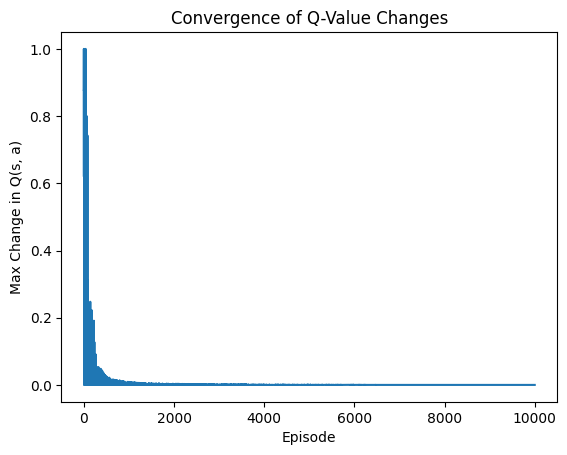

In [2]:
import matplotlib.pyplot as plt

ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

def print_values(V, g):
    """
    Print the value function in a grid layout.
    :param V: Dictionary mapping each state to its value.
    :param g: Grid object, used for dimensions and layout.
    """
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i, j), 0)  # Get the value for each state, default to 0 if not in V
            if v >= 0:
                print(" %.2f|" % v, end="")  # Format for positive values
            else:
                print("%.2f|" % v, end="")  # Format for negative values
        print("")
    print("\n")

def print_policy(P, g):
    """
    Print the policy in a grid layout.
    :param P: Dictionary mapping each state to the optimal action under the policy.
    :param g: Grid object, used for dimensions and layout.
    """
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i, j), ' ')  # Get the action for each state, default to blank if not in policy
            print("  %s  |" % a, end="")
        print("")
    print("\n")

def play_game(grid, policy, max_steps=20):
    """
    Play an episode in the gridworld using the provided policy.
    :param grid: The grid object representing the environment.
    :param policy: The policy to follow, mapping states to actions.
    :param max_steps: Maximum number of steps to allow in the episode.
    :return: A tuple (states, actions, rewards), where:
             - states: List of states visited in the episode.
             - actions: List of actions taken in the episode.
             - rewards: List of rewards received at each step.
    """
    # Reset the game to start at a random position
    start_states = list(grid.actions.keys())  # Get all valid starting states
    start_idx = np.random.choice(len(start_states))  # Randomly choose a starting state index
    grid.set_state(start_states[start_idx])  # Set the grid's state to the randomly chosen start state

    s = grid.current_state()  # Get the current state
    a = np.random.choice(ALL_POSSIBLE_ACTIONS)  # First action is chosen uniformly at random

    # Initialize lists to track the episode's states, actions, and rewards
    states = [s]
    actions = [a]
    rewards = [0]  # Initial reward is 0 (no action taken yet)

    for _ in range(max_steps):  # Iterate for a maximum of `max_steps`
        r = grid.move(a)  # Take the chosen action and receive a reward
        s = grid.current_state()  # Update the current state

        # Record the results of this step
        rewards.append(r)
        states.append(s)

        if grid.game_over():  # Check if the game is over (terminal state reached)
            break
        else:
            a = policy[s]  # Choose the next action based on the current policy
            actions.append(a)  # Append the action to the list

    # Return the episode's trajectory: states, actions, and rewards
    return states, actions, rewards

def max_dict(d):
    """
    Return the key with the maximum value and the corresponding max value from a dictionary.
    :param d: Dictionary where keys are actions and values are their corresponding scores.
    :return: A tuple (key, max_value).
    """
    # Find the maximum value in the dictionary
    max_val = max(d.values())

    # Find all keys corresponding to the maximum value (in case of ties)
    max_keys = [key for key, val in d.items() if val == max_val]

    # Randomly choose one of the keys with the maximum value (break ties randomly)
    return np.random.choice(max_keys), max_val


def monte_carlo_control_exploring_starts(grid, gamma=0.9, iterations=10000, policy=None, plot=True, verbose=True):
    """
    Perform Monte Carlo Control using the Exploring-Starts method to find the optimal policy.

    :param grid: Grid object representing the environment.
    :param gamma: Discount factor for future rewards (default: 0.9).
    :param iterations: Number of episodes to simulate (default: 10,000).
    :param policy: Initial policy mapping states to actions. If None, a random policy is initialized.
    :param plot: If True, plot the convergence graph (default: True).
    :param verbose: If True, print progress and final outputs (default: True).
    :return: A tuple (V, policy, deltas) where:
             - V: State-value function representing the expected return for each state.
             - policy: The optimal policy learned through Monte Carlo Control.
             - deltas: List of maximum changes in Q(s, a) for each iteration.
    """
    # Initialize a random policy if none is provided
    if policy is None:
        policy = {s: np.random.choice(ALL_POSSIBLE_ACTIONS) for s in grid.actions.keys()}

    # Initialize Q(s, a) and sample_counts
    Q = {}
    sample_counts = {}
    for s in grid.all_states():
        if s in grid.actions:  # Only initialize for non-terminal states
            Q[s] = {a: 0 for a in ALL_POSSIBLE_ACTIONS}  # Initialize Q(s, a) to 0
            sample_counts[s] = {a: 0 for a in ALL_POSSIBLE_ACTIONS}  # Initialize sample counts to 0

    # Track the maximum changes for plotting convergence
    deltas = []

    # Main Monte Carlo loop
    for it in range(iterations):
        if verbose and it % (iterations // 10) == 0:  # Print progress every 10% of iterations
            print(f"Iteration {it}/{iterations}")
            print()

        # Generate an episode using the current policy
        states, actions, rewards = play_game(grid, policy)

        # Create a list of (state, action) pairs
        states_actions = list(zip(states, actions))

        T = len(states)
        G = 0  # Initialize return
        biggest_change = 0  # Track the largest change in Q for this episode

        # Work backward through the episode to calculate returns
        for t in range(T - 2, -1, -1):  # Exclude the terminal state
            s = states[t]
            a = actions[t]

            # Calculate the return G
            G = rewards[t + 1] + gamma * G

            # First-visit check: Only update if (s, a) is not in the previous part of the trajectory
            if (s, a) not in states_actions[:t]:
                old_q = Q[s][a]
                sample_counts[s][a] += 1  # Increment the sample count
                lr = 1 / sample_counts[s][a]  # Learning rate decreases with more samples
                Q[s][a] = old_q + lr * (G - old_q)  # Update Q(s, a)

                # Update the policy to be greedy with respect to Q(s, a)
                policy[s] = max_dict(Q[s])[0]

                # Track the largest change in Q(s, a)
                biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))

        deltas.append(biggest_change)  # Record the largest change for this episode

    # Derive the state-value function V(s) from Q(s, a)
    V = {s: max_dict(Q[s])[1] for s in Q}

    # print rewards
    print("Rewards:")
    print_values(grid.rewards, grid)

    # Print outputs
    print("Final Policy:")
    print_policy(policy, grid)

    print("Final Value Function:")
    print_values(V, grid)

    # Plot the convergence graph if plot is True
    if plot:
        plt.plot(deltas)
        plt.title("Convergence of Q-Value Changes")
        plt.xlabel("Episode")
        plt.ylabel("Max Change in Q(s, a)")
        plt.show()

    # Return the final value function, policy, and convergence metrics
    return V, policy, deltas

if __name__ == "__main__":
    gamma = 0.9
    iterations = 10000
    grid = negative_grid(step_cost=-0.1)

    monte_carlo_control_exploring_starts(grid, gamma=gamma, iterations=iterations, plot=True, verbose=True)